In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

np.random.seed(101)

In [2]:
df = pd.read_csv('train.csv')

# Analise Exploratória dos dados

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


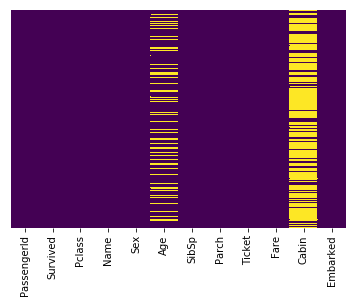

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

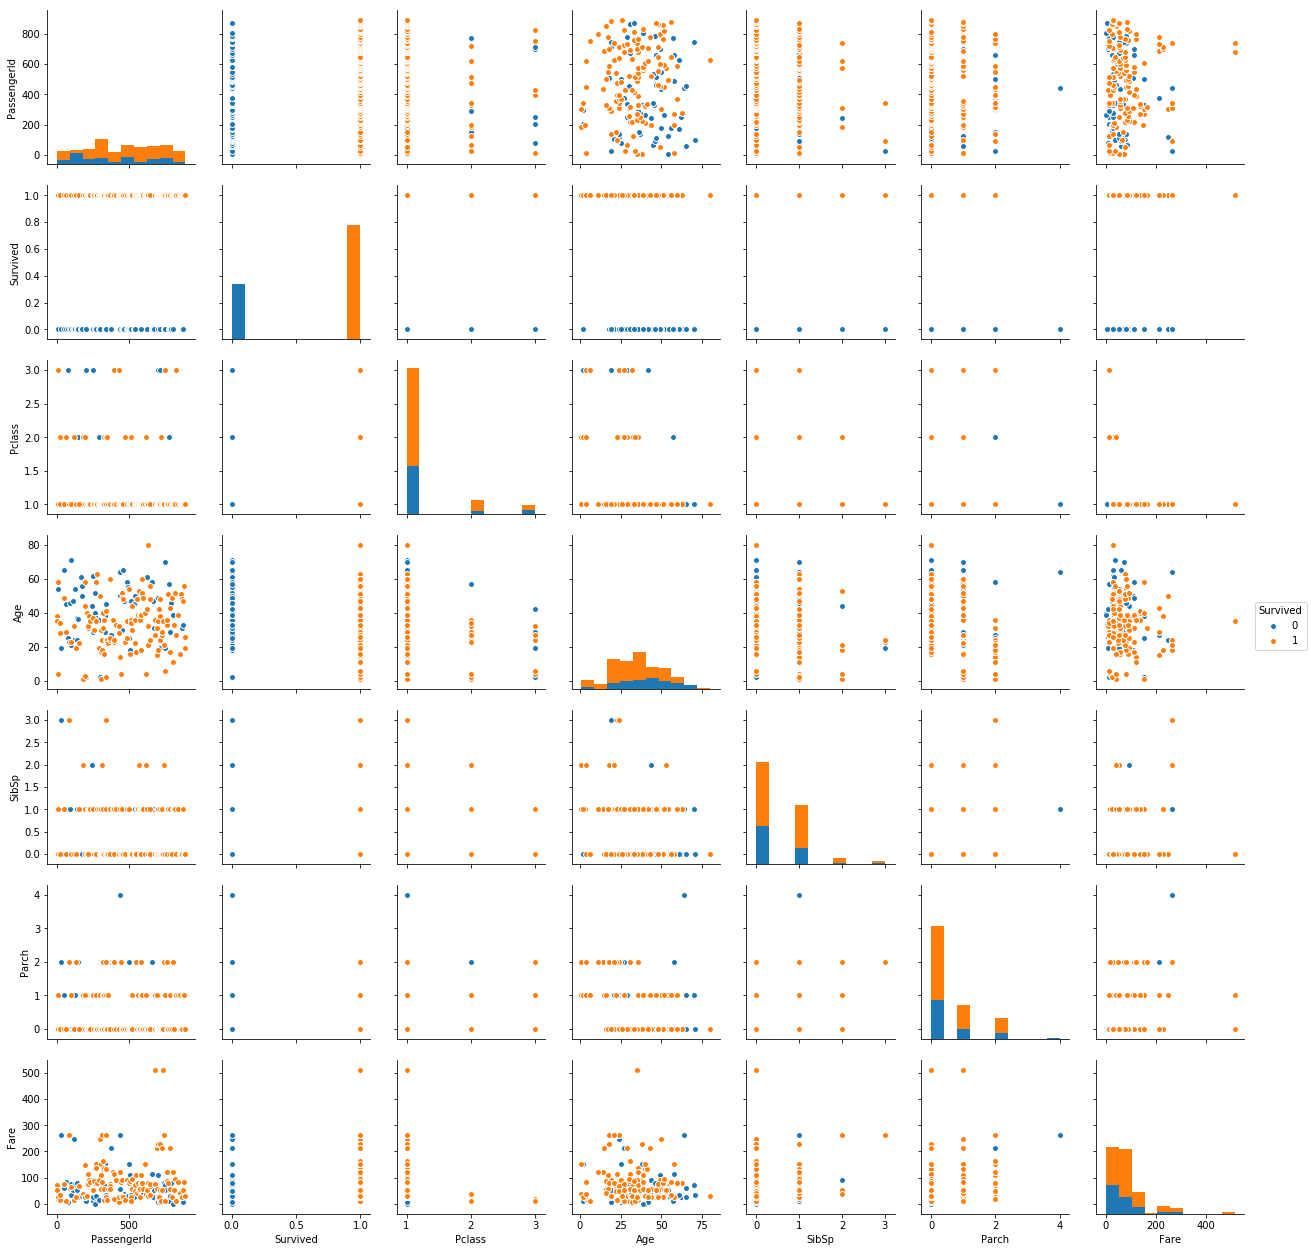

In [6]:
sns.pairplot(df.drop('Name', axis = 1).dropna(), hue = 'Survived')

In [7]:
df.groupby('Survived').count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

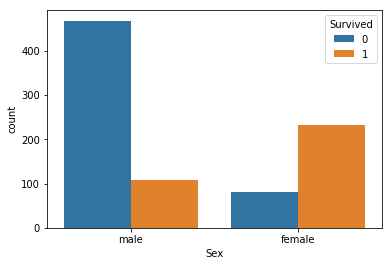

In [8]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

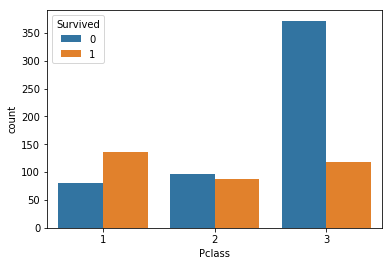

In [9]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

In [11]:
df_an = df.copy()
df_an['Cabin'] = df['Cabin'].dropna().apply(lambda x: x[0])

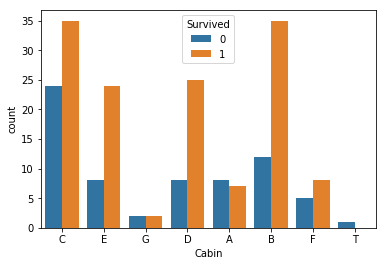

In [12]:
sns.countplot(x = 'Cabin', hue = 'Survived', data = df_an)

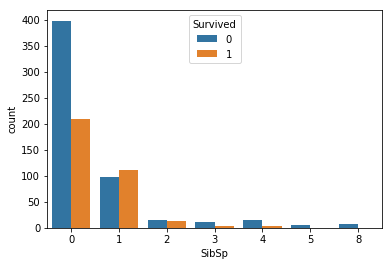

In [13]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = df)

In [14]:
df_an['count'] = 1
param = 'Parch'
count = df_an.groupby(param).count()['count']

<Container object of 7 artists>

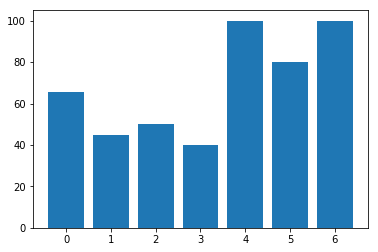

In [15]:
values = []
for i in count.index:
    values.append((df_an[(df_an[param] == i) & (df_an['Survived'] == 0)]['count'].count() / count.loc[i]) * 100)
    
plt.bar(count.index.tolist(), values)

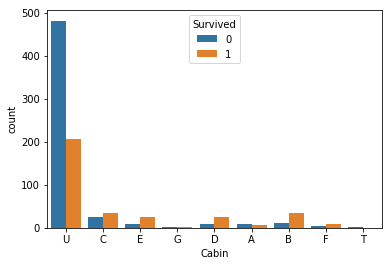

In [16]:
df_an = df
df_an['Cabin']  = df_an['Cabin'].fillna('U').apply(lambda x: x[0])
sns.countplot(x = 'Cabin', hue = 'Survived', data = df_an)